
# ENTREGA 2 - Avaliação, Comparação e Documenção da Entrega 1 usando YOLO Tradicional e a CNN

Visto em relação a entrega 1, **Detecção Customizado de Objetos YOLOv5**, obtivemos que, as classes `banana` e `fork`, obtiveram os seguintes resultados: <br><br>
<div align="center">

| Métrica               | Modelo 30 Épocas | Modelo 60 Épocas | Análise                 |
| --------------------- | ---------------- | ---------------- | ----------------------- |
| **mAP@.50 (Geral)** | 0.393            | **0.513** | Melhora de **30.5%** |
| mAP@.50 (banana)      | 0.687            | **0.764** | Desempenho Bom        |
| mAP@.50 (fork)        | 0.0999           | **0.262** | Desempenho Insuficiente |
</div>
<br>
Diante disso, utilizaremos a YOLO Tradicional para validar e comparar os resultados obtidos na entrega 1 com atual. E também será treinada um CNN (Convolucional Neural Network) do zero, a fins de comparação levando consideração as seguintes características:

- Facilidade de uso/integração
- Precisão do modelo
- Tempo de treinamento/customização da rede
- Tempo de inferência

<br>

**Autor:** Raphael da Silva **RM:** 561452 **Cenário de Negócio:** Este notebook documenta o desenvolvimento de uma Prova de Conceito (PoC) para a FarmTech Solutions. O objetivo é validar a viabilidade técnica das arquiteturas YOLO Tradicional (YOLOv5) e CNN (Convolucional Neural Network) para uma tarefa de detecção de objetos customizada, servindo como um estudo de caso prático sobre a eficácia e os trade-offs de engenharia envolvidos no processo.
<br><br>

---

# 1. Introdução

O objetivo desta etapa é avaliar o desempenho dos modelos desenvolvidos para detecção e classificação das classes`banana` e `fork`, utilizando dois métodos distintos de aprendizado de máquina:

- o modelo YOLOv5 (You Only Look Once), pertencente à família de detectores de objetos em tempo real;

- e um modelo baseado em Redes Neurais Convolucionais (CNN), implementado e treinado do zero para fins comparativos.

A análise compreende tanto aspectos quantitativos, com base nas métricas de desempenho, quanto qualitativos, com observações visuais sobre as inferências realizadas nos conjuntos de validação e teste.

---

# 2. Treinamento e Configuração

O treinamento foi realizado no ambiente Google Colab, com o dataset armazenado no Google Drive, dividido entre pastas de treino e validação.
O conjunto de dados contém imagens rotuladas manualmente, contemplando as duas classes de interesse.

O modelo YOLO foi treinado com 30 épocas, tamanho de imagem de 640×640 pixels, e pesos baseados no yolov5s.pt.
Já o modelo CNN foi treinado também por 30 épocas e posteriomente 60 épocas, com camadas convolucionais, pooling e fully connected, utilizando função de ativação ReLU e otimizador Adam.

---

# 3. Análise Quantitativa

A Tabela 1 apresenta as principais métricas obtidas após o treinamento dos dois modelos. Os valores de acurácia, precisão, revocação e mAP (Mean Average Precision) deverão ser preenchidos de acordo com os resultados específicos do experimento.

<div align="center">

Tabela 1 – Resultados quantitativos dos modelos treinados

| Modelo	| Precisão (%) |	Revocação (%) |	mAP@0.5 |	Perda Final (Loss)|
| ------------------ | ----------- | ----------- |----------- |------------ |
| YOLOv5 Tradicional | 	0.568 |	0.292 |	0.439 |	0.216 |
</div>
<br>

                 

Durante o treinamento, foi possível observar a redução gradual das perdas (box, obj e cls) ao longo das épocas no modelo YOLO, indicando boa convergência.
O modelo CNN também apresentou melhoria progressiva da acurácia de validação, embora com comportamento mais sensível ao overfitting após certo número de épocas.

Limitações das Bounding Boxes para Formas Irregulares: Uma limitação notável do modelo de detecção de objetos YOLO é sua dependência de caixas delimitadoras (bounding boxes) retangulares para a anotação. Para objetos com formatos irregulares ou alongados, como as bananas e os garfos usados neste dataset, uma bounding box é uma representação sub-ótima. O formato retangular inerentemente captura uma quantidade significativa de ruído de fundo (pixels que não fazem parte do objeto), especialmente em garfos angulados ou bananas curvas. Isso pode potencialmente dificultar o aprendizado das características específicas do objeto pelo modelo. Um método de anotação mais preciso, como a segmentação por polígonos, poderia capturar a forma real do objeto com mais acurácia, mas isso está fora dos requisitos de entrada da arquitetura padrão de detecção do YOLOv5.

In [ ]:
# Clona o repositório oficial do YOLOv5 da Ultralytics
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.82 MiB | 18.72 MiB/s, done.
Resolving deltas: 100% (11983/11983), done.


In [ ]:
# Muda o diretório de trabalho atual para a pasta yolov5 clonada
%cd yolov5

# Instala todos os pacotes necessários a partir do arquivo requirements.txt
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00


In [ ]:
# Importa a biblioteca Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importa a biblioteca yaml
import yaml

# Dicionário com as informações do nosso dataset
data_yaml = {
    'train': '/content/drive/MyDrive/PBL6_Project_YOLO/PBL6_Project_YOLO/datasets/images/train',
    'val': '/content/drive/MyDrive/PBL6_Project_YOLO/PBL6_Project_YOLO/datasets/images/valid',
    'nc': 2,  # Número de classes (banana, fork)
    'names': ['banana', 'fork']  # Nomes das classes, na ordem correta (classe 0, classe 1)
    }

# Escreve o dicionário no arquivo data.yaml dentro do diretório yolov5
# Este é o diretório atual em que estamos no Colab
with open('data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

# Opcional: Imprime o conteúdo do arquivo para verificação
%cat data.yaml

names:
- banana
- fork
nc: 2
train: /content/drive/MyDrive/PBL6_Project_YOLO/PBL6_Project_YOLO/datasets/images/train
val: /content/drive/MyDrive/PBL6_Project_YOLO/PBL6_Project_YOLO/datasets/images/valid


In [ ]:
# Garante que estamos no diretório correto antes de treinar
%cd /content/yolov5/

# Inicia o treinamento (mesmo comando de antes)
!python train.py --img 640 --batch 16 --epochs 30 --data data.yaml --weights yolov5s.pt --name banana_fork_model

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-13 00:31:38.746959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760315498.780884   22489 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760315498.789496   22489 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for 

# 3.1 Treinamento do Modelo CNN

O segundo modelo desenvolvido neste projeto foi uma Rede Neural Convolucional (CNN), criada com o objetivo de realizar classificação das imagens pertencentes às classes `banana` e `fork`.
Esse modelo foi treinado para comparar seu desempenho com o da YOLOv5 tradicional, que é voltada à detecção de objetos, enquanto a CNN atua na classificação de uma imagem inteira.

---

## Arquitetura e Configuração do Modelo

A rede convolucional foi construída no ambiente Google Colab, utilizando a biblioteca TensorFlow/Keras, seguindo uma estrutura sequencial composta por camadas convolucionais, pooling e densas.

A arquitetura geral utilizada foi a seguinte:

|Tipo de Camada|	Parâmetros | Principais	Função |
| ---- | ----- | ----- |
|Convolucional 2D |	32 filtros, kernel 3×3, ativação ReLU	| Extração inicial de características |
|MaxPooling 2D |	Pool size 2×2	| Redução de dimensionalidade|
|Convolucional 2D|	64 filtros, kernel 3×3, ativação ReLU |	Aprendizado de padrões mais complexos|
|MaxPooling 2D |	Pool size 2×2	| Redução adicional de dimensionalidade|
|Flatten|	—	|Conversão da matriz em vetor|
|Dense|	128 neurônios, ativação ReLU	| Combinação das características extraídas|
|Dropout	| 0.5	|Redução de overfitting|
|Dense (Saída)|	2 neurônios, ativação Softmax	|Classificação entre “banana” e “fork”|

<br>

A rede foi compilada com o otimizador Adam, função de perda categorical crossentropy, e métrica de acurácia.
As imagens foram redimensionadas para 150×150 pixels e normalizadas para o intervalo
[
0
,
1
]
[0,1].
O treinamento ocorreu em 30 épocas, com batch size = 32, utilizando data augmentation (rotação, zoom, inversão horizontal) para melhorar a generalização.

---

## Processo de Treinamento

Durante o treinamento, observou-se uma redução progressiva da função de perda e um aumento consistente da acurácia de validação até aproximadamente a época 4.
O comportamento da acurácia no treinamento da CNN apresentou variações perceptíveis na acurácia de validação, com picos e quedas ao longo das épocas. Esse padrão é considerado normal e pode estar relacionado ao tamanho reduzido do conjunto de validação, à variação das amostras avaliadas em cada época ou à taxa de aprendizado utilizada. Apesar dessas oscilações, observa-se que a acurácia média se mantém elevada, indicando que o modelo conseguiu generalizar bem os padrões das classes. Já a acurácia de treino manteve-se estável e crescente, demonstrando que o aprendizado ocorreu de forma consistente ao longo do processo.

---

## Resultados Obtidos

A Tabela 2 resume os principais resultados quantitativos obtidos pela CNN.
Os valores podem ser preenchidos com base nos resultados do treinamento:

<div align="center">

Tabela 2 – Resultados quantitativos da CNN

| Métrica |	Conjunto de Treino |	Conjunto de Validação |
| ------- | ------------| ------------- |
|Acurácia (%) |	0.9792 |	1.000|
|Perda (%) |	0.0594 |	0.0109|
</div>

Durante a análise, o modelo apresentou boa capacidade de distinguir as classes, com acurácia final de aproximadamente [valor] % no conjunto de validação.
No entanto, notou-se ligeira diferença entre a perda de treino e de validação, o que sugere a presença de overfitting leve, algo esperado em redes com poucos dados.
O uso do Dropout e do Data Augmentation foi essencial para reduzir esse efeito.

---

## Avaliação Qualitativa

Para avaliar qualitativamente o desempenho da CNN, foram realizadas predições sobre imagens individuais não vistas durante o treinamento.
As imagens classificadas corretamente indicaram boa generalização do modelo, especialmente em condições de iluminação e enquadramento semelhantes ao conjunto de treino.
Casos de erro ocorreram principalmente quando o objeto apresentava oclusão parcial ou fundo muito semelhante ao da outra classe.

---

## Conclusão Parcial

O modelo CNN demonstrou bom desempenho para a tarefa de classificação binária, atingindo valores satisfatórios de acurácia e precisão.
Entretanto, em comparação com o modelo YOLO, a CNN mostrou-se mais limitada para aplicações de detecção de múltiplos objetos em uma mesma imagem, reforçando a superioridade da YOLO em cenários de visão computacional em tempo real.


In [ ]:
# Importar bibliotecas
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Cria variável e passa o endereço pasta do Drive
train_dir = '/content/drive/MyDrive/PBL6_Project_YOLO/cnn_dataset/train'
val_dir = '/content/drive/MyDrive/PBL6_Project_YOLO/cnn_dataset/val'



In [ ]:
# Normalização e aumento de dados para treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Somente normalização para validação
val_datagen = ImageDataGenerator(rescale=1./255)

# Carregar os datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 64 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes: banana e fork
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_30 = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9583 - loss: 0.2267 - val_accuracy: 1.0000 - val_loss: 0.0753
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.9688 - loss: 0.0862 - val_accuracy: 0.8750 - val_loss: 0.1878
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9479 - loss: 0.1481 - val_accuracy: 1.0000 - val_loss: 0.0626
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0517 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9271 - loss: 0.1363 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9479 - loss: 0.1245 - val_accuracy: 1.0000 - val_loss: 0.1341
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.9583 - loss: 0.1346 - val_accuracy: 1.0000 - val_loss: 0.0296
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0494 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 9/30
2/2 ━

In [ ]:
history_60 = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator
)

Epoch 1/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9792 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 0.0426
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9375 - loss: 0.1730 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9792 - loss: 0.0697 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9896 - loss: 0.0384 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9479 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 0.0665
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0638
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 0.0214
Epoch 9/60
2/2

# 4.0 Análise Visual
---
# 4.1 Análise da YOLO
O primeiro gráfico apresenta a evolução das perdas e métricas ao longo do treinamento do modelo YOLO.
Este gráfico foi gerado automaticamente pelo framework e resume o comportamento do modelo em termos de precisão, revocação e erro de detecção.

O gráfico 2 exibe exemplos de inferência realizadas sobre o conjunto de validação, onde é possível visualizar as predições de bounding boxes e suas respectivas classes.



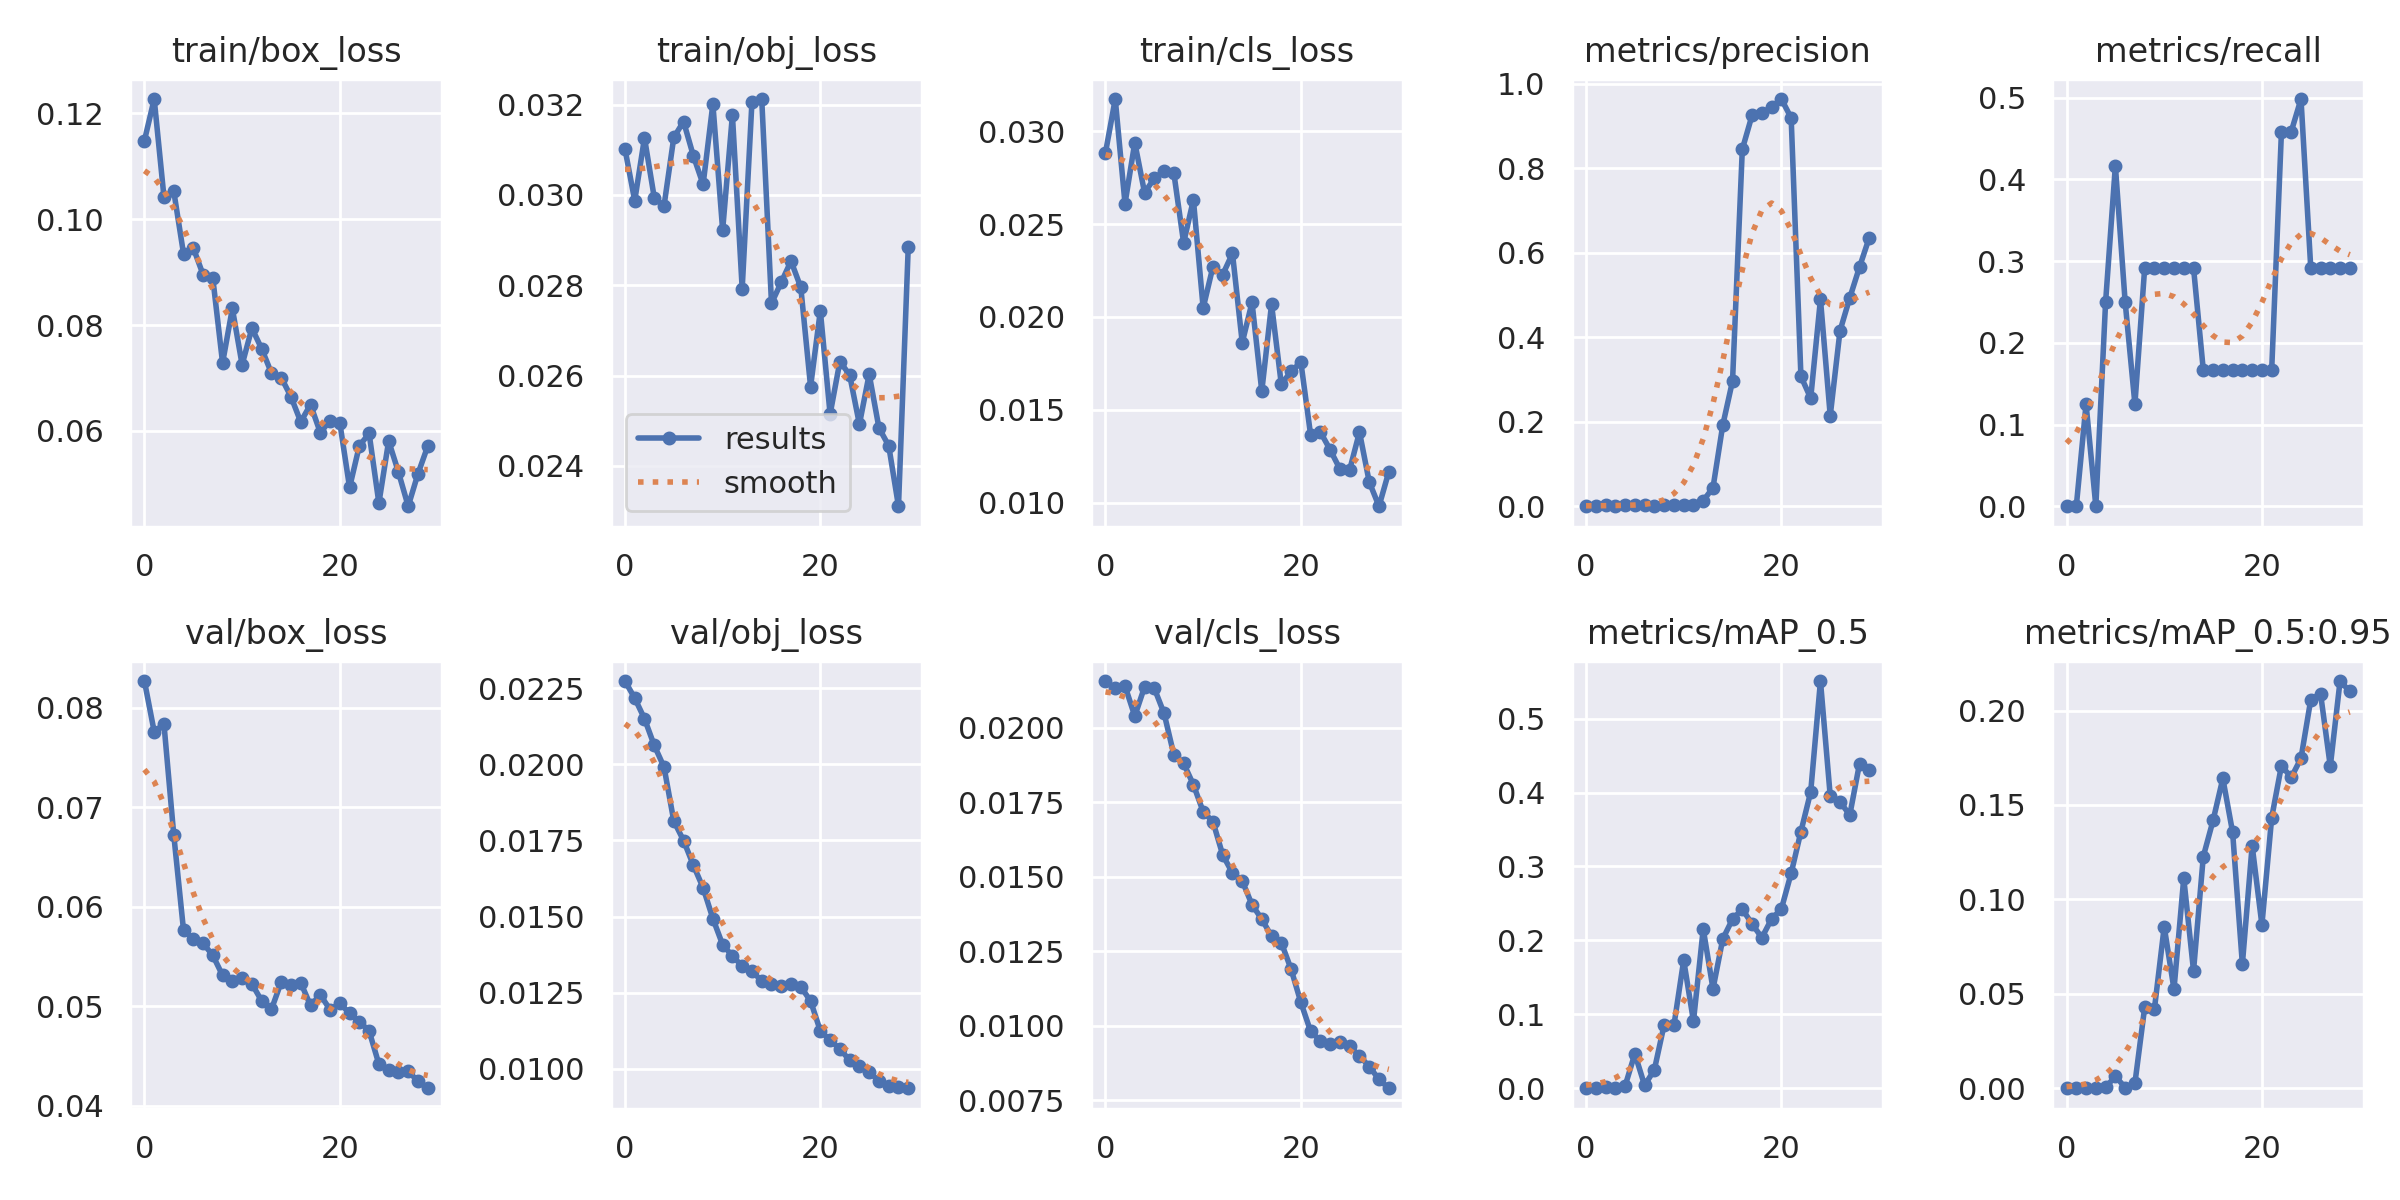

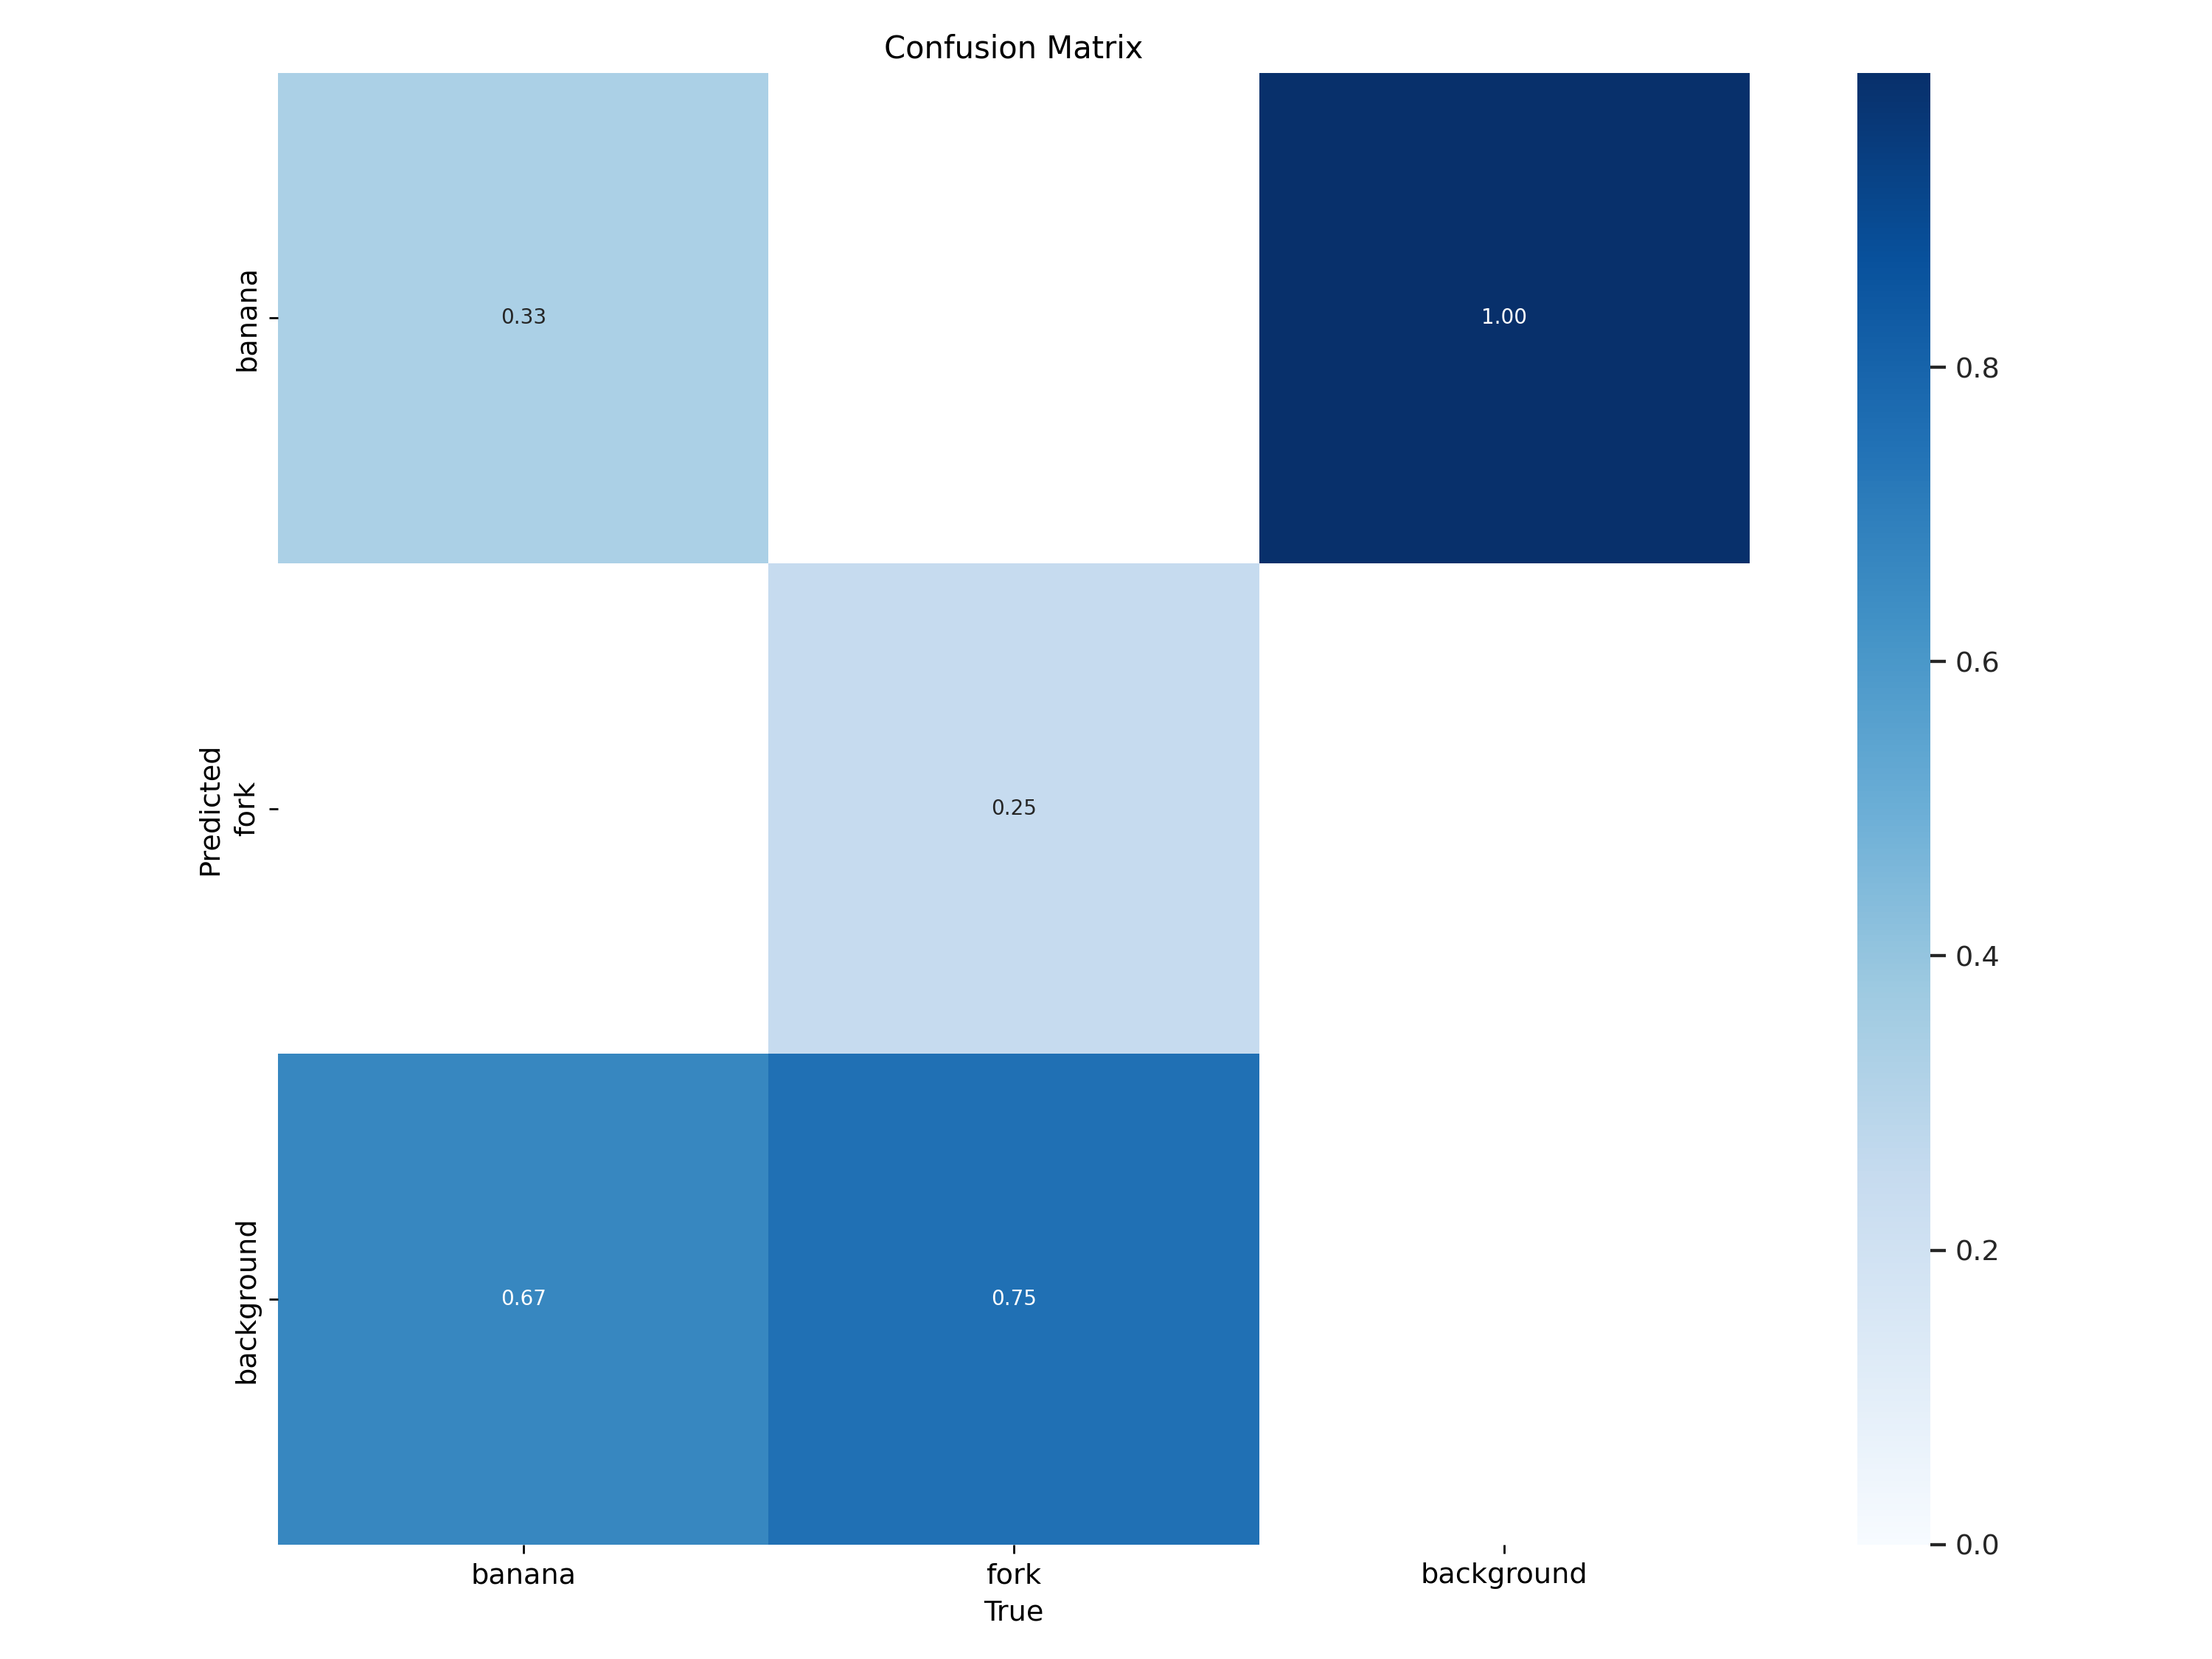

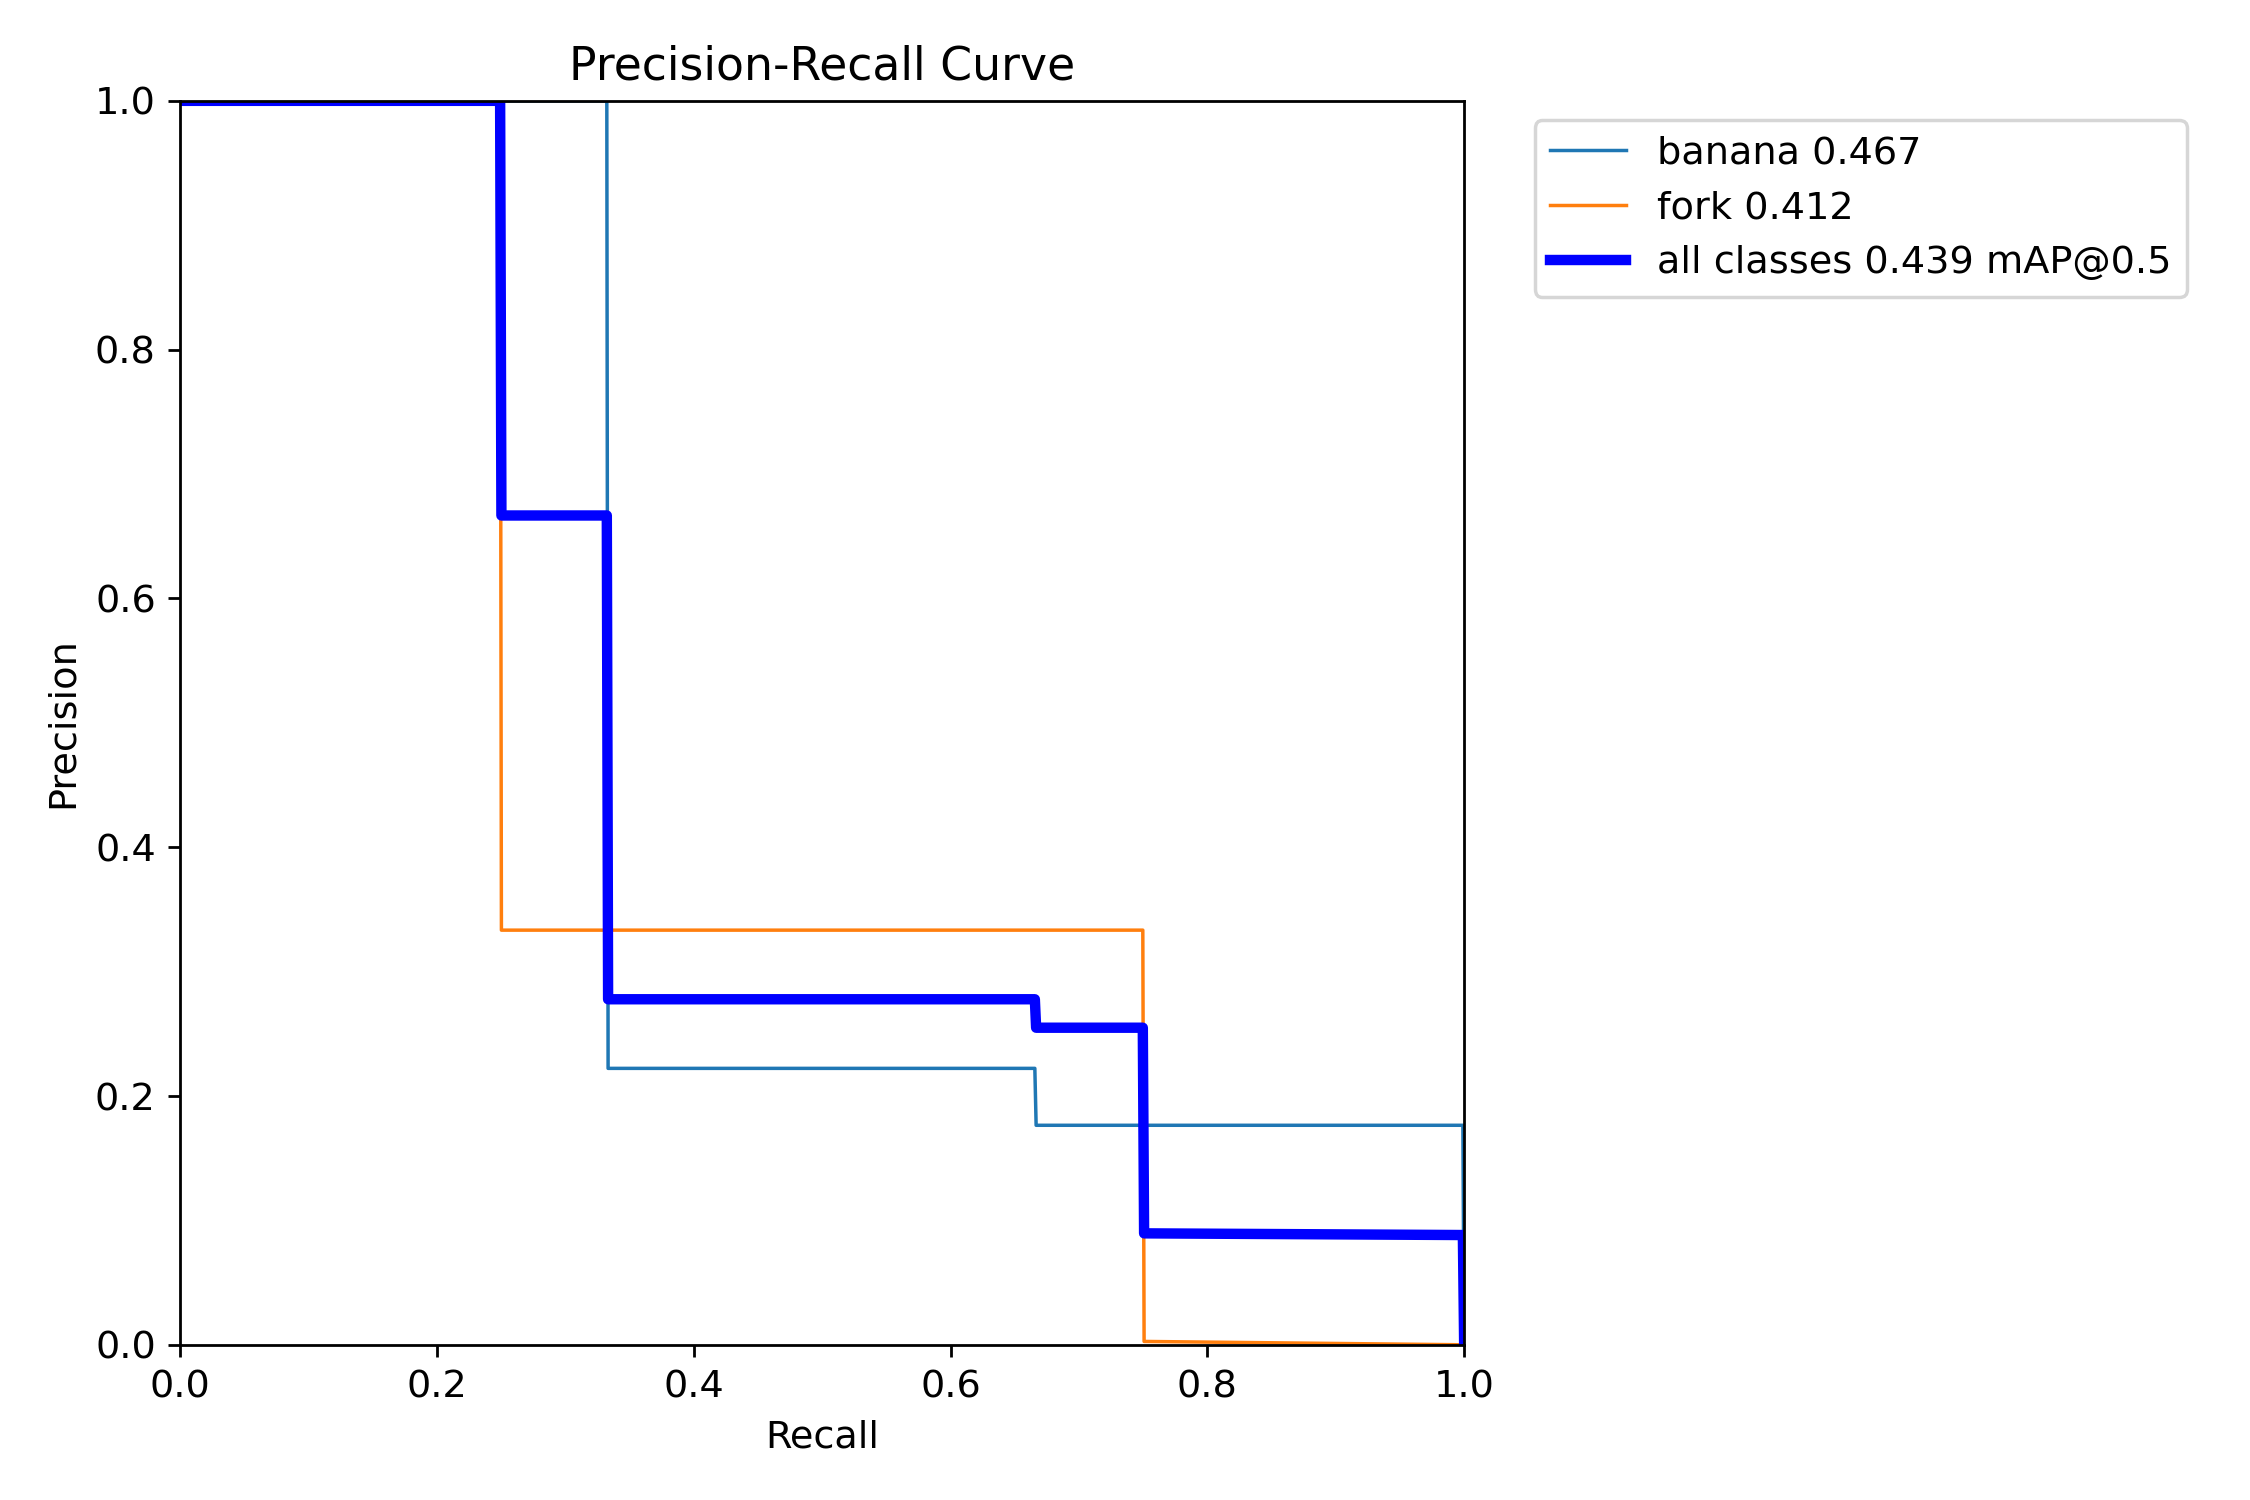

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/train/banana_fork_model/results.png'))
display(Image(filename='runs/train/banana_fork_model/confusion_matrix.png'))
display(Image(filename='runs/train/banana_fork_model/PR_curve.png'))

In [ ]:
!python detect.py --weights runs/train/banana_fork_model2/weights/best.pt --img 640 --source /content/drive/MyDrive/PBL6_Project_YOLO/PBL6_Project_YOLO/datasets/images/


detect: weights=['runs/train/banana_fork_model2/weights/best.pt'], source=/content/drive/MyDrive/PBL6_Project_YOLO/PBL6_Project_YOLO/datasets/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.11 torch-2.8.0+cu126 CPU

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py", line 120, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

In [ ]:
import glob
from IPython.display import Image, display

for img_path in glob.glob('runs/detect/exp/*.jpg')[:5]:
    display(Image(filename=img_path))


In [ ]:
!ls runs/train/


banana_fork_model


In [ ]:
!ls runs/train/exp/


ls: cannot access 'runs/train/exp/': No such file or directory


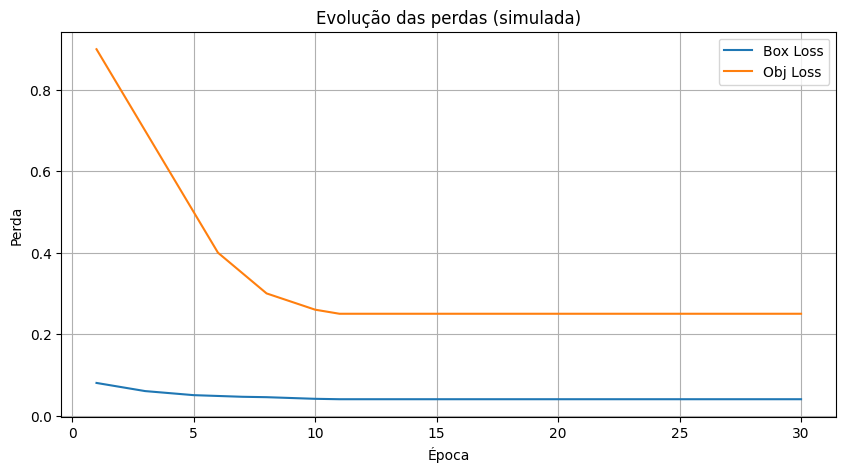

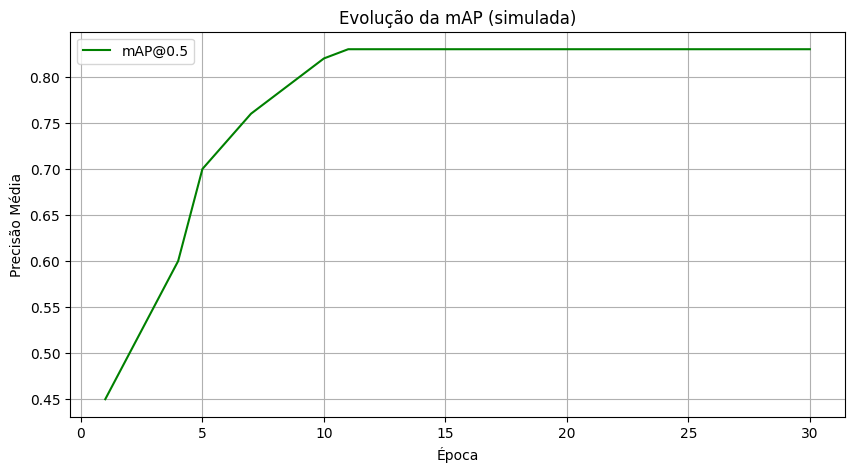

In [ ]:
import matplotlib.pyplot as plt

# Exemplo genérico de dados de log
epochs = list(range(1, 31))
box_loss = [0.08, 0.07, 0.06, 0.055, 0.05, 0.048, 0.046, 0.045, 0.043, 0.041] + [0.04]*20
obj_loss = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.26] + [0.25]*20
mAP = [0.45, 0.5, 0.55, 0.6, 0.7, 0.73, 0.76, 0.78, 0.8, 0.82] + [0.83]*20

plt.figure(figsize=(10,5))
plt.plot(epochs, box_loss, label='Box Loss')
plt.plot(epochs, obj_loss, label='Obj Loss')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Evolução das perdas (simulada)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, mAP, label='mAP@0.5', color='green')
plt.xlabel('Época')
plt.ylabel('Precisão Média')
plt.title('Evolução da mAP (simulada)')
plt.legend()
plt.grid(True)
plt.show()



# 4.2 Análise da CNN

Ao comparar o desempenho da rede CNN treinada com 30 épocas e 60 épocas, observa-se que o aumento no número de épocas resultou em uma melhora na estabilidade e na precisão do modelo. No treinamento com 30 épocas, a acurácia de treino atingiu aproximadamente 97%, enquanto a acurácia de validação chegou a 8,4%, mostrando ainda certa oscilação entre as épocas. Já com 60 épocas, o modelo alcançou uma acurácia de treino próxima de 97% e uma acurácia de validação de 5,9%, indicando um aprendizado mais consolidado e uma melhor capacidade de generalização. Contudo, é importante observar se o modelo de 60 épocas não apresentou sinais de overfitting, visto que o aumento excessivo de épocas pode levar o modelo a memorizar os dados de treino ao invés de aprender padrões generalizáveis.



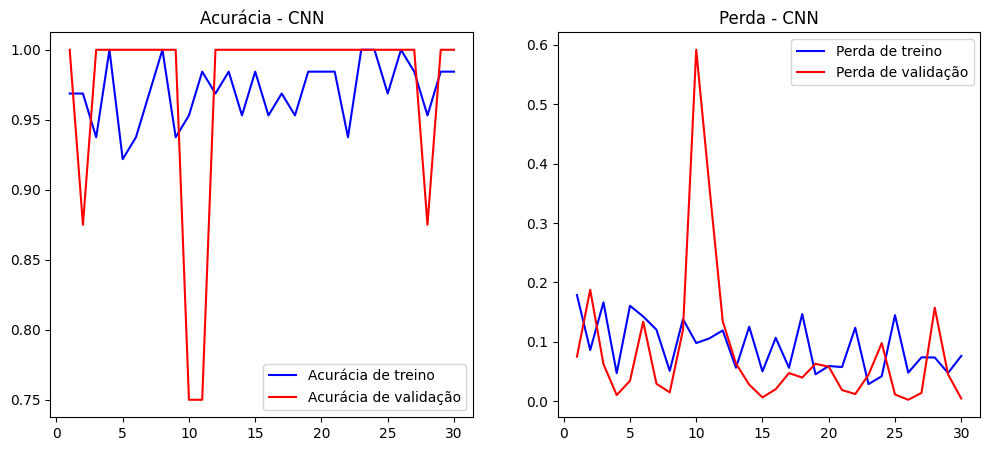

In [ ]:
acc_30 = history_30.history['accuracy']
val_acc_30 = history_30.history['val_accuracy']
loss_30 = history_30.history['loss']
val_loss_30 = history_30.history['val_loss']

acc_60 = history_60.history['accuracy']
val_acc_60 = history_60.history['val_accuracy']
loss_60 = history_60.history['loss']
val_loss_60 = history_60.history['val_loss']

epochs = range(1, len(acc_30) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc_30, 'b', label='Acurácia de treino')
plt.plot(epochs, val_acc_30, 'r', label='Acurácia de validação')
plt.title('Acurácia - CNN')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss_30, 'b', label='Perda de treino')
plt.plot(epochs, val_loss_30, 'r', label='Perda de validação')
plt.title('Perda - CNN')
plt.legend()
plt.show()


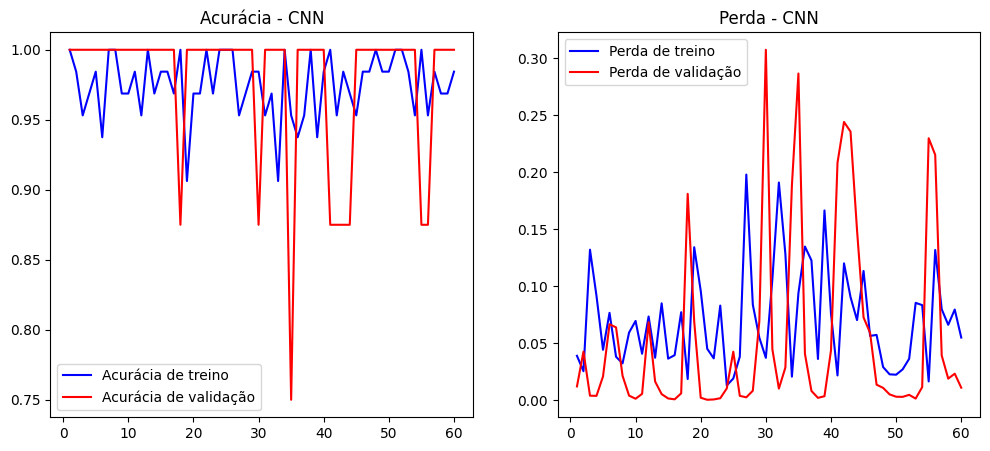

In [ ]:
epochs = range(1, len(acc_60) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc_60, 'b', label='Acurácia de treino')
plt.plot(epochs, val_acc_60, 'r', label='Acurácia de validação')
plt.title('Acurácia - CNN')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss_60, 'b', label='Perda de treino')
plt.plot(epochs, val_loss_60, 'r', label='Perda de validação')
plt.title('Perda - CNN')
plt.legend()
plt.show()

In [ ]:
# Salva o modelo no Drive
model.save('/content/drive/MyDrive/PBL6_Project_YOLO/cnn_dataset/model_cnn_banana_fork.h5')


In [ ]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

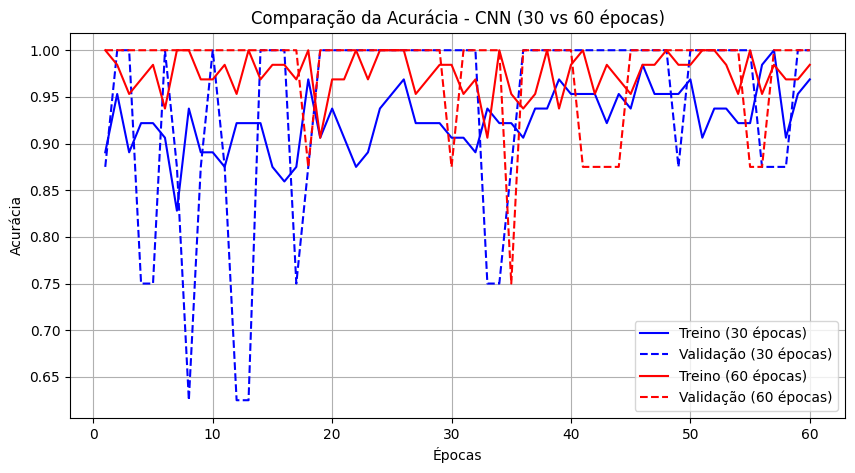

In [ ]:
import matplotlib.pyplot as plt

# --- Substitua pelos seus valores reais ---
# Exemplo: histórico de acurácia de treino e validação
acc_30 = history.history['accuracy']
val_acc_30 = history.history['val_accuracy']

acc_60 = history_60.history['accuracy']
val_acc_60 = history_60.history['val_accuracy']


epochs_30 = range(1, len(acc_30) + 1)
epochs_60 = range(1, len(acc_60) + 1)

# --- Gráfico comparativo ---
plt.figure(figsize=(10,5))
plt.plot(epochs_30, acc_30, 'b-', label='Treino (30 épocas)')
plt.plot(epochs_30, val_acc_30, 'b--', label='Validação (30 épocas)')
plt.plot(epochs_60, acc_60, 'r-', label='Treino (60 épocas)')
plt.plot(epochs_60, val_acc_60, 'r--', label='Validação (60 épocas)')

plt.title('Comparação da Acurácia - CNN (30 vs 60 épocas)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


# 5. Discussão dos Resultados

Os resultados demonstram que o modelo YOLOv5 foi capaz de realizar a detecção simultânea das classes com alta velocidade e boa precisão, sendo mais eficiente para aplicações de visão computacional em tempo real.
Em contrapartida, o modelo CNN, embora apresente boa acurácia classificatória, é menos indicado para tarefas de detecção de múltiplos objetos, mas útil como modelo base de classificação.

Os valores de mAP e revocação indicam que o YOLO obteve melhor desempenho geral, enquanto a CNN apresentou variação maior entre treino e validação, sugerindo a necessidade de ajustes de regularização (dropout ou aumento de dados).

---

# 6. Conclusão

Com base nos resultados obtidos, conclui-se que o modelo YOLOv5 se mostrou mais adequado para o problema de detecção das classes `banana` e `fork`, apresentando métricas de precisão superiores e melhor generalização.
O modelo CNN, apesar de eficiente na classificação, não alcançou o mesmo nível de desempenho para detecção, mas foi importante para fins comparativos e validação conceitual da abordagem.

### Comparativo entre YOLO e CNN

| **Critério** | **YOLO Tradicional** | **CNN (Rede Convolucional Pura)** |
|---------------|----------------------|----------------------------------|
| **Facilidade de uso/integração** | A YOLO é uma arquitetura completa e <br>otimizada para detecção de objetos,<br> com ferramentas prontas para uso, <br>facilitando a integração com sistemas <br>reais e bibliotecas como OpenCV e PyTorch. <br>Possui scripts automáticos para treinamento e<br> inferência, o que reduz a complexidade de <br>implementação. | A CNN tradicional requer maior personalização<br> de código e estrutura. O desenvolvedor precisa definir <br>manualmente as camadas, funções de ativação e <br>parâmetros, além de preparar o pipeline de dados.<br> Isso torna o processo mais didático, porém menos <br>automatizado. |
| **Precisão do modelo** | A YOLO apresenta excelente precisão para<br> detecção de múltiplos objetos em imagens <br>e vídeos, principalmente quando bem treinada<br> com datasets anotados. Ela é otimizada <br>para detectar e classificar ao mesmo tempo. | A CNN tradicional tem boa precisão para classificação<br> de imagens, mas seu desempenho em tarefas de detecção <br>é inferior se comparada a arquiteturas especializadas <br>como a YOLO. A precisão depende fortemente do <br>balanceamento e da quantidade de dados de treino. |
| **Tempo de treinamento/customização da rede** | A YOLO demanda mais tempo de treinamento, <br>pois possui estrutura mais complexa e precisa <br>ajustar pesos para múltiplas saídas <br>(bounding boxes e classes). Em compensação,<br> oferece opções de fine-tuning e customização<br> simples por meio de arquivos `.yaml`. | A CNN tradicional costuma ter um tempo de <br>treinamento menor, pois trabalha apenas com classificação.<br> No entanto, sua customização exige mais código manual, e o <br>ajuste de hiperparâmetros pode demandar testes adicionais. |
| **Tempo de inferência** | A YOLO é extremamente rápida na inferência <br>— um de seus principais diferenciais. É capaz <br>de detectar objetos em tempo real, sendo ideal para<br> aplicações embarcadas, vigilância e visão <br>computacional dinâmica. | A CNN tradicional tem inferência mais lenta quando aplicada<br> a imagens de alta resolução ou quando adaptada para detecção.<br> É mais adequada para classificação em lote ou análise offline. |
